In [1]:
from tensorflow.keras.models import Sequential  #← 匯入 Keras 的序列式模型類別
from tensorflow.keras.layers import Dense       #← 匯入 Keras 的密集層類別

model_a = Sequential()                 #← 用 add() 建立序列模型物件
model_a.add(Dense(512, activation='relu', input_dim= 784)) #← 加入第一層
model_a.add(Dense(10, activation='softmax'))               #← 加入第二層

model_b = Sequential([                 #← 建立序列模型物件並加入串列中的層
         Dense(512, activation='relu', input_dim= 784),
         Dense(10, activation='softmax')])


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation  #← 匯入啟動函數層類別

model = Sequential([
        Dense(512, input_dim= 784), #← 第一密集層不指定 (省略) 啟動函數
        Activation('relu'),         #← 接著加入 relu 啟動函數層
        Dense(10),                  #← 第二密集層同樣不指定啟動函數
        Activation('softmax')])     #← 接著加入 softmax 啟動函數層
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [3]:
import util2 as u  # 匯入自訂工具模組, 並更名為 u

(x_train, x_test), (y_train, y_test) = u.mnist_data()  # 用 4 個變數接收傳回值
model = u.mnist_model()  # 取得新建立並編譯好的模型

model.fit(x_train, y_train, epochs=5, batch_size=128) # 用取得的資料與模型進行訓練


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2579 - acc: 0.9249
Epoch 2/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1028 - acc: 0.9700
Epoch 3/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0674 - acc: 0.9803
Epoch 4/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0489 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0373 - acc: 0.9887


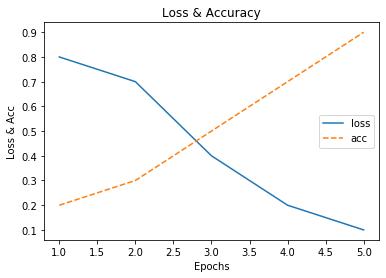

In [4]:
import util2 as u  # 匯入自訂工具模組

history_dict = {'loss': [0.8,0.7,0.4,0.2,0.1],   #} 2 個 key 的數據字典
                'acc':  [0.2,0.3,0.5,0.7,0.9]}   #}
u.plot(history_dict, ('loss','acc'),
       'Loss & Accuracy',
       ('Epochs', 'Loss & Acc'))


In [5]:
# 以字典取得與還原模型結構的方法

from tensorflow.keras.models import Sequential
import util2 as u

model = u.mnist_model()  # 取得新建立並編譯好的模型

config = model.get_config()            # 以字典傳回模型結構
model = Sequential.from_config(config) # 載入模型結構

# 上一行若為 Function API 模型, 須改用 Model 來載入結構：
# from tensorflow.keras.models import Model
# model = Model.from_config(config)  # 載入 Functional API 模型結構

# 以 JSON 字串取得與還原模型結構的方法
from tensorflow.keras.models import model_from_json
json_string = model.to_json()         # 以 JSON 字串傳回模型結構
model = model_from_json(json_string)  # 載入模型結構

# 以 YAML 字串取得與還原模型結構的方法
from tensorflow.keras.models import model_from_yaml
yaml_string = model.to_yaml()         # 以 YAML 字串傳回模型結構
model = model_from_yaml(yaml_string)  # 載入模型結構

##################################################

# 用 JSON 格式儲存模型結構
from tensorflow.keras.models import model_from_json

json_string = model.to_json()
with open("model.config", "w") as text_file:
    text_file.write(json_string)

# 讀取 JSON 格式的模型結構並還原
from tensorflow.keras.models import model_from_json

with open("model.config", "r") as text_file:
    json_string = text_file.read()
    model = model_from_json(json_string)

##################################################

# 取得、還原權重參數
weights = model.get_weights()   # 取得權重參數
print(weights)
model.set_weights(weights)      # 還原權重參數

##################################################

# 儲存、載入權重參數
model.save_weights("model.weight")   # 儲存權重參數到 HDF5 格式的檔案中
model.load_weights("model.weight")   # 載入權重參數



[array([[ 0.03904404, -0.05755395, -0.02927354, ...,  0.04831535,
        -0.06353275, -0.06470865],
       [ 0.05076277, -0.05716647, -0.04466937, ...,  0.0117554 ,
         0.03674497, -0.01866254],
       [-0.05054385,  0.03796523, -0.04812118, ...,  0.00455763,
         0.04201572, -0.02797479],
       ...,
       [-0.05766964, -0.06048063,  0.04241239, ..., -0.04543602,
         0.05479598,  0.04669865],
       [ 0.0267163 ,  0.03842123,  0.05043191, ..., -0.02239368,
        -0.03766097, -0.02052594],
       [ 0.05659943,  0.03741606, -0.04162854, ..., -0.00587808,
         0.05427004, -0.05207379]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

C:\Users\supervisor\20191107\lib\site-packages\tensorflow_core\python\keras\saving\model_config.py:76: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(yaml_string)


In [ ]:
import pandas as pd
import util2 as u     # 匯入自訂的工具模組

df = pd.read_csv("Admission_Predict_Ver1.1.csv",sep = ",")

import numpy as np

np.random.seed(6)       # 設定亂數的種子, 以便每次執行產生的亂數序列都相同
ds = df.values          # 取出 DataFrame 中的資料 (不含標題欄)
np.random.shuffle(ds)   # 將所有資料洗牌 (隨機重排)

x = ds[:, 1:8]   # 取出所有資料列的第 1 到 7 欄資料做為樣本資料
y = ds[:, 8]     # 取出所有資料列的第 8 欄資料做為標籤資料

x_train = x[:400]  #} 前 400 筆 (0~399) 做為訓練用
y_train = y[:400]  #}
x_test  = x[400:]  #} 後 100 筆 (400~499) 做為測試用
y_test  = y[400:]  #}

###############################

mean = x_train.mean(axis=0)  #←沿著第 0 軸 (樣本數軸) 對每個特徵做平均, 因此 mean.shape 為 (13,)
std = x_train.std(axis=0)    #←沿著第 0 軸 (樣本數軸) 對每個特徵算標準差, std.shape 同樣為 (13,)

x_train -= mean  #← 將訓練樣本減平均值
x_train /= std   #← 再除以標準差

x_test  -= mean  #← 將測試樣本減平均值
x_test  /= std   #← 再除以標準差

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def train(unit1, unit2, epoch, batch):
    np.random.seed(8)       # 設定亂數的種子, 以便每次執行產生的亂數序列都相同
    model = Sequential()
    model.add(Dense(unit1, activation='relu', input_dim=7))
    if unit2>0: model.add(Dense(unit2, activation='relu'))
    model.add(Dense(1))           #←不加任何啟動函數
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

    wt = model.get_weights()    #←儲存模型的初始權重
    ksize = len(x_train) // 4   #←計算每折的資料筆數

    all_his_mae = []   #←建立變數來儲存每次訓練的 mae 歷史資料
    all_his_val = []   #←建立變數來儲存每次訓練的 val_mae 歷史資料
    print(f'●訓練與測試 Dense({unit1:2},{unit2:2}) epoch={epoch:3} batch={batch:2}：', end='')
    if show_info==2: print()        #←換行
    for i in range(4):
        print(f'第 {i} 摺訓練與驗證' if show_info==2 else f'>{i}', end='')
        fr, to = i*ksize, (i+1)*ksize  #←計算驗證資料的起點 fr 和終點 to (不含)
        x_val = x_train[fr: to]        #←取出驗證樣本
        x_trn = np.concatenate([x_train[ :fr],  #←準備訓練樣本：取驗證資料以外的部份
                                x_train[to: ]], axis=0)
        y_val = y_train[fr: to]        #←取出驗證標籤
        y_trn = np.concatenate([y_train[ :fr],  #←準備訓練標籤：取驗證資料以外的部份
                                y_train[to: ]], axis=0)

        model.set_weights(wt)  #←還原初始權重 (效果等於重建模型, 以便重新訓練)
        history =  model.fit(x_trn, y_trn,
                             validation_data=(x_val, y_val),  #←指定驗證資料
                             epochs=epoch,
                             batch_size=batch,
                             verbose=0)       #←安靜模式 (不顯示訊息)
        if show_info==2:
            hv = history.history['val_mae']  #←取得驗證的歷史記錄
            idx = np.argmin(hv)    #←找出最佳驗證週期
            val = hv[idx]          #←取得最佳驗證的 mae 值
            u.plot(history.history,
                       ('mae', 'val_mae'), #←繪製準確率的歷史線圖
                       f'k={i} Best val_mae at epoch={idx+1} val_mae={val:.3f}',
                       ('Epoch','mae'), ylim=(0.03, 0.08))

        all_his_mae.append(history.history['mae'])     #←儲存 mae 歷史驗證資料
        all_his_val.append(history.history['val_mae']) #←儲存 val_mae 歷史驗證資料

    avg_mae = np.mean(all_his_mae, axis=0)  #←沿著第 0 軸 (k 折軸) 對每個 mae 結果做平均, 因此 avg.shape 為 (200,)
    avg_val = np.mean(all_his_val, axis=0)  #←沿著第 0 軸 (k 折軸) 對每個驗證結果做平均, 因此 avg.shape 為 (200,)
    idx = np.argmin(avg_val)   #← 找出最佳平均驗證結果的週期 (由 0 算起)
    val = round(avg_val[idx], 3)   #←取得最佳平均驗證的 mae 值, 並四捨五入到小數 3 位
    print(f'>平均最佳週期={idx+1:3} val_mae={val:<5.3f}',end='')  #←顯示最佳週期 (由 1 算起) 及其 mae 值
    if show_info:
        u.plot({'avg_mae': avg_mae, 'avg_val_mae': avg_val},  #←繪製歷史線圖
               ('avg_mae', 'avg_val_mae',),
               f'Best avg val_mae at epoch {idx+1} val_mae={val:.3f}',
               ('Epoch','mae'), ylim=(0.03, 0.08))
    model.set_weights(wt)  #←還原初始權重 (效果等於重建模型, 以便重新訓練)
    history =  model.fit(x_train, y_train,
                         epochs=idx+1,        #訓練最佳次數
                         batch_size=batch,    #每批次 batch 筆資料
                         verbose=0)       #安靜模式 (不顯示訊息)
    loss, mae = model.evaluate(x_test, y_test, verbose=0)  #←用測試資料評估成效
    #    print('重練', idx+1, '週期, 再評估 mae =', round(mae*100, 1))
    print(f'用所有訓練資料重新訓練到第 {idx+1} 週期, 用測試資料'
          if show_info else f', 重訓練', end='')
    print(f'評估 mae={mae:<5.3f}')

show_info = 1   # 顯示哪種資訊： 0-簡要資訊, 1-簡要資訊+平均驗證圖, 2-詳細資料
epoch = 200     # 訓練週期

for batch in (1, 2, 4, 8, 16):
    for u2 in (0, 4, 8, 16):
        for u1 in (4, 8, 16):
            train(u1, u2, epoch, batch)